In [60]:
import os
os.path.abspath(os.getcwd())

'/Users/raghavendra/ClassesSem3/CSC215/Project/ProjectFinal'

In [65]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [66]:
import pandas as pd

In [134]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


In [68]:
df = pd.read_csv('targetResultFileTest2.csv')

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
df.head()

,tweet_id,text,sentiment,favourite_count,retweet_count
0,1240728088767533064,RT @chrisdelia: These people are absolute dogs...,0.500000,0,21032
1,1240728089270734848,RT @toriarenee_: This is for CORONA you big f...,-0.333333,0,48440
2,1240728089333837835,RT @CandiceBenbow: This is Generation Z. \n\nI...,0.500000,0,100737
3,1240728089652604930,RT @MakedaMorrison: Day 5: We have rediscovere...,0.000000,0,268086
4,1240728089916628992,RT @CandiceBenbow: This is Generation Z. \n\nI...,0.500000,0,100737


In [76]:
df.drop_duplicates('text',keep=False,inplace=True)

In [77]:
df.shape

(22296, 5)

In [80]:
df.head()

,tweet_id,text,sentiment,favourite_count,retweet_count
6,1240728088545234947,#theboxchallenge 📦- @roddyricch 📦- the box\n#c...,0.000000,5,1
8,1240728090264961024,@xandatoto @MoHCCZim What about in Netherlands...,0.107792,0,0
13,1240728090487259136,"🚨🚨ITSR: Corona-pocolypse: Death, Deceit and De...",0.000000,4,4
14,1240728091183337473,RT @ambrishparajiya: Statistic of #Corona Effe...,0.000000,0,7
16,1240728091279974416,Dunno what is threatening America more. Corona...,-0.033333,6,0


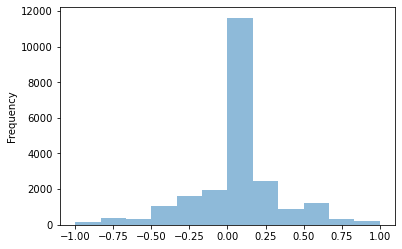

In [81]:
df['sentiment'].plot.hist(bins=12, alpha=0.5)

In [83]:
df['label'] = 0

In [84]:
df.shape

(22296, 6)

In [85]:
count1 = 0
count2 = 0
count3 = 0

for ind in df.index: 
    if df['sentiment'][ind]<=-0.40:
        count1 = count1 + 1
        df['label'][ind]='negative'
    if df['sentiment'][ind]>-0.40 and df['sentiment'][ind]<0.40:
        count2 = count2 + 1
        df['label'][ind]='neutral'
    if df['sentiment'][ind]>=0.40:
        count3 = count3 + 1
        df['label'][ind]='positive'
        
print(count1)
print(count2)
print(count3)
            
    
        

<ipython-input-85-a241b945f887>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][ind]='neutral'
/Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-85-a241b945f887>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][ind]='positive'
<ipython-input-85-a241b945f887>:8: Settin

1682
18278
2336


In [86]:
df.head()

,tweet_id,text,sentiment,favourite_count,retweet_count,label
6,1240728088545234947,#theboxchallenge 📦- @roddyricch 📦- the box\n#c...,0.000000,5,1,neutral
8,1240728090264961024,@xandatoto @MoHCCZim What about in Netherlands...,0.107792,0,0,neutral
13,1240728090487259136,"🚨🚨ITSR: Corona-pocolypse: Death, Deceit and De...",0.000000,4,4,neutral
14,1240728091183337473,RT @ambrishparajiya: Statistic of #Corona Effe...,0.000000,0,7,neutral
16,1240728091279974416,Dunno what is threatening America more. Corona...,-0.033333,6,0,neutral


In [87]:
label = encode_text_index(df,"label")
df.head()

,tweet_id,text,sentiment,favourite_count,retweet_count,label
6,1240728088545234947,#theboxchallenge 📦- @roddyricch 📦- the box\n#c...,0.000000,5,1,1
8,1240728090264961024,@xandatoto @MoHCCZim What about in Netherlands...,0.107792,0,0,1
13,1240728090487259136,"🚨🚨ITSR: Corona-pocolypse: Death, Deceit and De...",0.000000,4,4,1
14,1240728091183337473,RT @ambrishparajiya: Statistic of #Corona Effe...,0.000000,0,7,1
16,1240728091279974416,Dunno what is threatening America more. Corona...,-0.033333,6,0,1


In [88]:
df.tail()

,tweet_id,text,sentiment,favourite_count,retweet_count,label
76262,1240741013796335618,RT @lonerojosh9: These idiot’s parents def hav...,-0.412500,0,1,0
76263,1240741013855055877,RT @Fly1mj: Yall folks so stupid. And I mean i...,-0.637500,0,1,0
76265,1240741014459027456,you gone have to shave that thang girl https:/...,0.000000,0,0,1
76266,1240741013662117891,@Telegraph All talk soon so more can be ok and...,0.500000,0,0,2
76267,1240741014551310350,When I pleaded with crafty Kenyans 6 days ago ...,-0.029444,3,1,1


In [89]:
#removed special charecters, connecting words and pronouns - we,as,you,he,him,and etc.
#remove stop words
#lemmatization (feet,foot,footer -> foot (generic word chosen))
#stemming (Greater -> great, taller -> tall )
#tokenisation
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)




In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raghavendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
df['cleanText']=df['text'].map(lambda s:preprocess(s))

In [91]:
df['cleanText']

6        theboxchallenge roddyricch box challenge thebo...
8        xandatoto mohcczim netherlands confirmed negat...
13       itsr corona pocolypse death deceit democracy t...
14       ambrishparajiya statistic corona effect world ...
16        dunno threatening america corona sheer stupidity
                               ...                        
76262    lonerojosh idiot parents def mad disappointed ...
76263              flymj yall folks stupid mean say stupid
76265                                gone shave thang girl
76266    telegraph talk soon say news see truth sky pro...
76267    pleaded crafty kenyans days ago producing fake...
Name: cleanText, Length: 22296, dtype: object

In [93]:
df['cleanText'][6]

'theboxchallenge roddyricch box challenge thebox roddyricch dance discover corona'

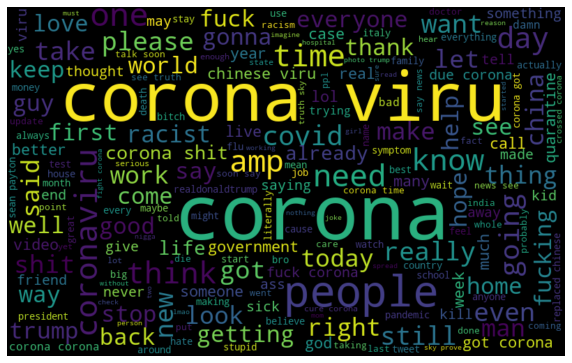

In [95]:
#story boarding :
#LINK: https://github.com/shaikhzhas/100DaysOfNLPCode/blob/master/DAY%2014%20.ipynb
#understanding most common words 
# create text from all tweets
all_words = ' '.join([text for text in df['cleanText']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

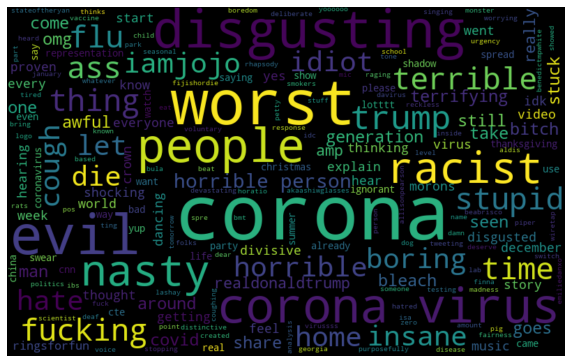

In [96]:
# negative
negative_words = ' '.join([text for text in df['cleanText'][df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

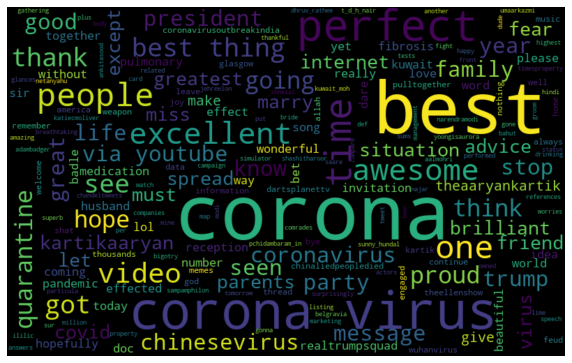

In [97]:
#positive

positive_words = ' '.join([text for text in df['cleanText'][df['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

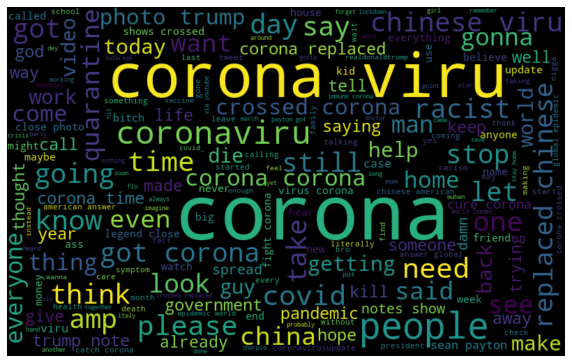

In [98]:
#normal words

normal_words = ' '.join([text for text in df['cleanText'][df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
## language detection if possible 

In [ ]:
####
# import sklearn.feature_extraction.text as sk_text

# vectorizer = sk_text.TfidfVectorizer(
#                              #stop_words='english',
#                              max_features = 1000,
#                              min_df=1)


# #max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

# matrix = vectorizer.fit_transform(df["cleanText"])

# print(type(matrix))          # Compressed Sparse Row matrix
# print(matrix.toarray()) 

In [ ]:
####
# print(vectorizer.get_feature_names())

In [ ]:
# import sklearn.feature_extraction.text as sk_text
# vectorizer = sk_text.TfidfVectorizer(#stop_words='english',
#                              #max_features = 1000,
#                              min_df=2, 
#                              max_df=500
#                              )

# #min_df: ignore terms that have a document frequency < min_df.
# #max_df: ignore terms that have a document frequency > max_df


# matrix = vectorizer.fit_transform(df["cleanText"])
# print(type(matrix))               # Compressed Sparse Row matrix

# tfidf_data = matrix.toarray()     #  convert it to numpy array

# print(tfidf_data)

In [ ]:
# print(vectorizer.get_feature_names())

In [ ]:
# tfidf_data

In [ ]:
# max_tweet_length = 20
# vector_size = 128

# tfidf_data = np.zeros((max_tweet_length, 
#               vector_size), dtype= np.float32)

In [ ]:
# for t, token in enumerate(tfidf_data[0]):
#         if t >= max_tweet_length:
#             break
#         if token not in model.wv:
#             continue
#         tfidf_data[t, :] = model.wv[token]

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['cleanText'])

In [123]:
tfidf.shape

(22296, 1000)

In [124]:
df.shape

(22296, 7)

In [125]:
x = tfidf[:22296,:]
# test = tfidf[15607:,:]

In [126]:
y = df['label'][:22296]

In [127]:
train_lr.shape

(22296,)

In [128]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [129]:
x_train.shape

(16722, 1000)

In [130]:
y_train.shape

(16722,)

In [136]:
x_test.shape

(5574, 1000)

In [137]:
y_test.shape

(5574,)

In [132]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Dense(12, input_dim = x.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(y.shape[0], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath="dnn/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=100)

model.load_weights('dnn/best_weights.hdf5') # load weights from best model

Epoch 1/100


ValueError: in user code:

    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:748 train_step
        loss = self.compiled_loss(
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /Users/raghavendra/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 22296) are incompatible


[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
Ploting confusion matrix


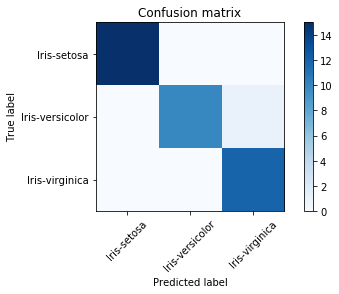

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [13]:
import numpy as np

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)
    
# Compute confusion matrix
cm = confusion_matrix(y_true, pred)
print(cm)

print('Ploting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, species)
plt.show()


print(classification_report(y_true, pred))

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train, train_lr, test_size = 0.3)

In [107]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
y_test.shape

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, pred))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, pred))
rms

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test, pred))

In [ ]:
from sklearn import svm
clf = svm.SVC()


In [ ]:
clf.fit(x_train,y_train)